# Symetric neuron

## 1. Dynamics


We are analyzing a system of two coupled ordinary differential equations:

$$
\frac{da}{dt} = P + \frac{\lambda_a \cdot a}{1 + k_a \cdot a} - \eta_a \cdot a - \mu_a \cdot a b
$$
$$
\frac{db}{dt} = N + \frac{\lambda_b \cdot b}{1 + k_b \cdot b} - \eta_b \cdot b - \mu_b \cdot a b
$$

Where:
- $a, b$: dynamic variables (e.g., population levels, concentrations)
- $P, N$: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$


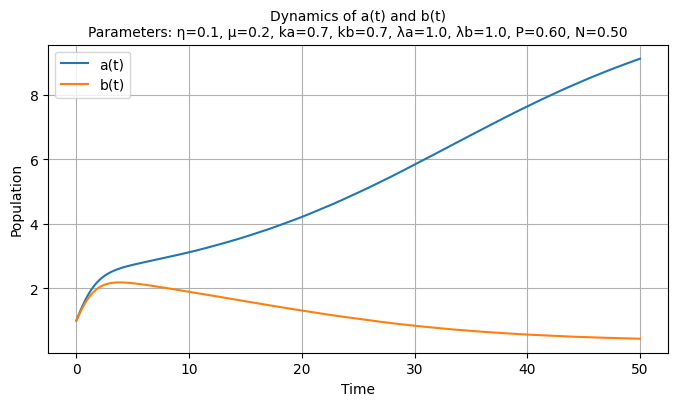

Output()

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive_output
from IPython.display import display, clear_output

# Fixed constants
eta = 0.1
mu = 0.2
ka = 0.7
kb = 0.7
lambda_a = 1.0
lambda_b = 1.0

# dydt function
def dydt(t, y, P, N):
    a, b = y
    da_dt = P + (lambda_a * a) / (1 + ka * a) - eta * a - mu * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta * b - mu * a * b
    return [da_dt, db_dt]

# Widgets
P_slider = widgets.FloatSlider(value=0.6, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()

# Set up figure
fig, ax = plt.subplots(figsize=(8, 4))

# Function to update plot
def update(P, N):
    ax.clear()

    # Initial conditions and time span
    y0 = [1.0, 1.0]
    t_span = [0, 50]
    t = np.linspace(0, 50, 1000)

    # Solve ODE
    sol = solve_ivp(lambda t, y: dydt(t, y, P, N), t_span, y0, t_eval=t)

    # Plot results
    ax.plot(sol.t, sol.y[0], label='a(t)')
    ax.plot(sol.t, sol.y[1], label='b(t)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    
    # Build title with all fixed parameters
    title_text = (
        f"Dynamics of a(t) and b(t)\n"
        f"Parameters: η={eta}, μ={mu}, ka={ka}, kb={kb}, λa={lambda_a}, λb={lambda_b}, "
        f"P={P:.2f}, N={N:.2f}"
    )
    ax.set_title(title_text, fontsize=10)
    ax.legend()
    ax.grid(True)

    # Refresh output
    with output:
        clear_output(wait=True)
        display(fig)

# Initial plot
update(P_slider.value, N_slider.value)

# Link widgets
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)

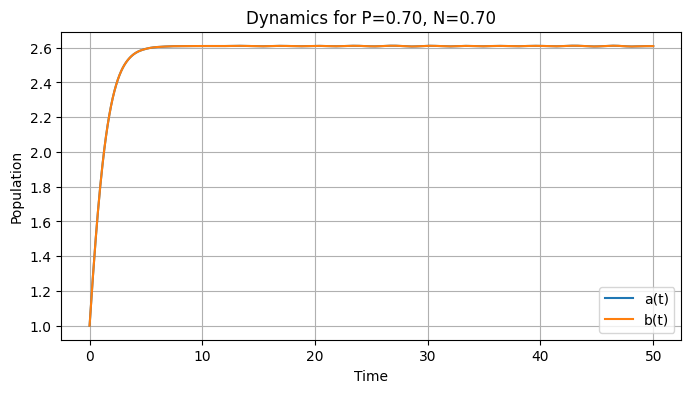
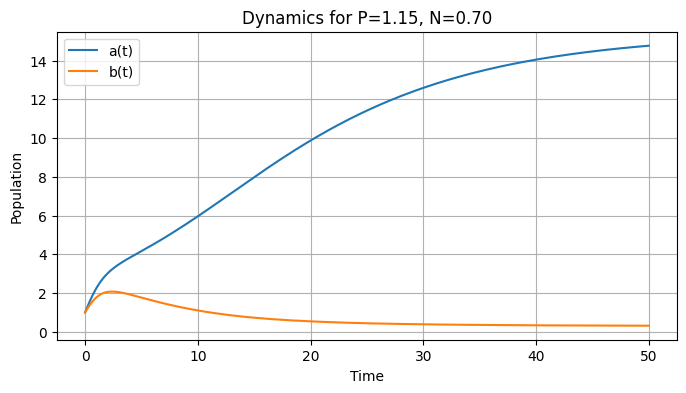
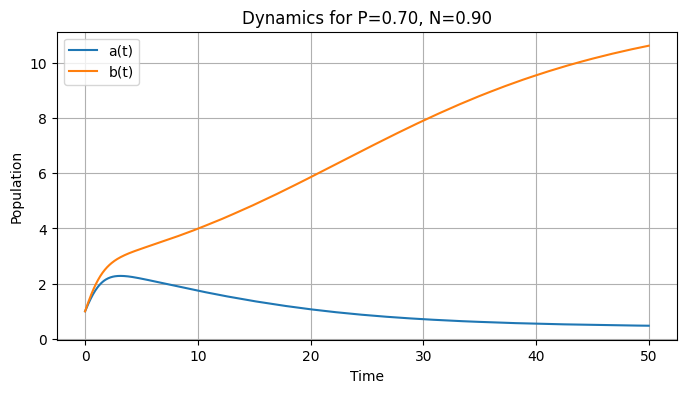

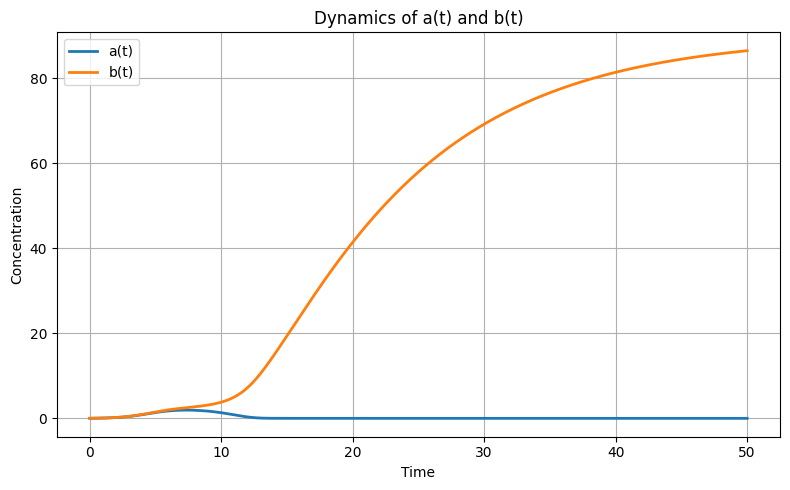

In [12]:
#With xin and xjp
"""
simulate_ab_constants.py

Integrates:
    da/dt = P + λ a/(1 + kα a) − η a − μ a b
    db/dt = N + λ̃ b/(1 + kβ b) − η b − μ a b

where P = ∑ w_{p,i} x_{p,i} and N = ∑ w_{n,j} x_{n,j} are fixed constants.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# === FIXED INPUTS AND WEIGHTS ===
# (edit these four constants as needed)
x_p = [1.0, 0.3]      # x_{p,1}, x_{p,2}
w_p = [0.017,0.025]      # w_{p,1}, w_{p,2}

x_n = [0.8, 0.5]      # x_{n,1}, x_{n,2}
w_n = [0.017, 0.0258]      # w_{n,1}, w_{n,2}

# Precompute the constant source terms P and N:
P = w_p[0]*x_p[0] + w_p[1]*x_p[1]
N = w_n[0]*x_n[0] + w_n[1]*x_n[1]

# === KINETIC PARAMETERS ===
lambda_a = 1.0    # λ
k_alpha  = 0.1    # k_α
lambda_b = 1.0    # λ̃
k_beta   = 0.1    # k_β
eta      = 0.1    # η
mu       = 0.3   # μ

# === ODE SYSTEM ===
def odes(t, y):
    a, b = y
    da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
    db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
    return [da, db]

# === INITIAL CONDITIONS & TIME GRID ===
y0     = [0.01, 0.01]               # [a(0), b(0)]
t_span = (0.0, 50.0)              # time interval
t_eval = np.linspace(*t_span, 1000)

# === INTEGRATION ===
sol = solve_ivp(
    odes,
    t_span,
    y0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-6,
    atol=1e-9
)

# === PLOTTING ===
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label='a(t)', linewidth=2)
plt.plot(sol.t, sol.y[1], label='b(t)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of a(t) and b(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



It seems to be a pure WTA dynamics. Indeed, if we introduce such a mutual symetric predation, then, both a and b are penalized the same way, and the only things that makes one of the 2 species to dominate is that the more there is a or b, the more the autocathalysis act. If all a and b constant are equal, then the winning substance only depends on initial concentrations of N and P. 

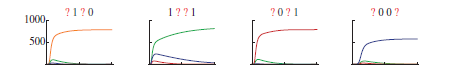
This is exactly like in the Rondelez 2013 article, with winner takes all (WTA).

### Q: Can we find configurations st the system is a bistable and not a WTA ?

Bistability means that the system can switch between two distincts stable outcome, and once the latter is reached, the system resits change (like a biological toggle switch).

- 1 stable fixed point : monostable, the system always go to the same state, whose eq value can move from a to b depending on N and P 

- 2 stables  fixed points and 1 unstable : bistable, the system can end up in either states

- no stable fixed point : no steady state.

For now, it seems we have a monostable WTA system. Depending on the N and P values, we end up on the same fixed point, whose value can be either a or b. 



We are analyzing a system of two coupled ordinary differential equations:

$$
\frac{da}{dt} = P + \frac{\lambda_a \cdot a}{1 + k_a \cdot a} - \eta_a \cdot a - \mu_a \cdot a b
$$
$$
\frac{db}{dt} = N + \frac{\lambda_b \cdot b}{1 + k_b \cdot b} - \eta_b \cdot b - \mu_b \cdot a b
$$

Where:
- $a, b$: dynamic variables (e.g., population levels, concentrations)
- $P, N$: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$

The Jacobian matrix $ J(a,b) $ is computed by taking partial derivatives of the right-hand sides with respect to $a$ and $b$.

Let:
- $ f(a,b) = \frac{da}{dt} $
- $ g(a,b) = \frac{db}{dt} $

Then the Jacobian is:

$$
J(a, b) =
\begin{bmatrix}
\frac{\partial f}{\partial a} & \frac{\partial f}{\partial b} \\
\frac{\partial g}{\partial a} & \frac{\partial g}{\partial b}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\lambda_a}{(1 + k_a a)^2} - \eta_a - \mu_a b & -\mu_a a \\
-\mu_b b & \frac{\lambda_b}{(1 + k_b b)^2} - \eta_b - \mu_b a
\end{bmatrix}
$$



- If all eigenvalues have negative real parts → **stable**
- If any eigenvalue has a positive real part → **unstable**

This helps identify whether the system is **monostable** (one stable fixed point) or **bistable** (two stable fixed points)



From our approximations, we can set that $\mu_a=\mu_b$ (symmetric predation) and $\eta_a=\eta_b$ (same degradation rate)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.linalg import eigvals
from ipywidgets import widgets, interactive_output
from IPython.display import display, clear_output
from matplotlib.lines import Line2D

# Parameters
eta_a = 0.1
eta_b = 0.1
mu_a = 0.2
mu_b = 0.2
k_a = 0.7
k_b = 0.7
lambda_a = 1.0
lambda_b = 1.0

# System equations
def da_dt(a, b, P):
    return P + (lambda_a * a) / (1 + k_a * a) - eta_a * a - mu_a * a * b

def db_dt(a, b, N):
    return N + (lambda_b * b) / (1 + k_b * b) - eta_b * b - mu_b * a * b

def system(y, P, N):
    a, b = y
    return [da_dt(a, b, P), db_dt(a, b, N)]

# Jacobian
def jacobian(a, b):
    dfda = (lambda_a / (1 + k_a * a)**2) - eta_a - mu_a * b
    dfdb = -mu_a * a
    dgda = -mu_b * b
    dgdb = (lambda_b / (1 + k_b * b)**2) - eta_b - mu_b * a
    return [[dfda, dfdb], [dgda, dgdb]]

# Meshgrid
a_vals = np.linspace(0.01, 20, 100)
b_vals = np.linspace(0.01, 20, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Sliders
P_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()

# Update function
def update(P, N):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Derivatives
    DA = da_dt(A, B, P)
    DB = db_dt(A, B, N)

    # Nullclines
    ax.contour(A, B, DA, levels=[0], colors='red', linewidths=2)
    ax.contour(A, B, DB, levels=[0], colors='blue', linewidths=2)

    # Fixed points
    fixed_points = []
    seen = []

    for a_guess in a_vals:
        for b_guess in b_vals:
            try:
                sol = root(lambda y: system(y, P, N), [a_guess, b_guess], method='hybr')
                if sol.success:
                    a_sol, b_sol = sol.x
                    if a_sol > 0.01 and b_sol > 0.01:
                        if not any(np.hypot(a_sol - x, b_sol - y) < 0.3 for x, y in seen):
                            fixed_points.append((a_sol, b_sol))
                            seen.append((a_sol, b_sol))
            except:
                continue

    # Stability
    stable_fps = []
    unstable_fps = []

    for a, b in fixed_points:
        J = jacobian(a, b)
        evals = eigvals(J)
        if np.all(np.real(evals) < 0):
            stable_fps.append((a, b))
            ax.plot(a, b, 'go', markersize=8)
        else:
            unstable_fps.append((a, b))
            ax.plot(a, b, 'ro', markersize=8)

    # Title
    num_stable = len(stable_fps)
    num_unstable = len(unstable_fps)
    status = "Bistable" if num_stable >= 2 else "Monostable" if num_stable == 1 else "No Stable FP"

    ax.set_title(
        f"{status} System\n"
        f"P={P:.2f}, N={N:.2f}\n"
        f"Stable FPs: {num_stable}, Unstable: {num_unstable}\n"
        f"ηₐ={eta_a}, ηᵦ={eta_b}, μₐ={mu_a}, μᵦ={mu_b}, kₐ={k_a}, kᵦ={k_b}, λₐ={lambda_a}, λᵦ={lambda_b}"
    )
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.grid(True)

    custom_lines = [
        Line2D([0], [0], color='red', lw=2),
        Line2D([0], [0], color='blue', lw=2),
        Line2D([0], [0], color='green', lw=0, marker='o', markersize=8),
        Line2D([0], [0], color='red', lw=0, marker='o', markersize=8)
    ]
    ax.legend(custom_lines, [
        r'$\frac{da}{dt} = 0$',
        r'$\frac{db}{dt} = 0$',
        'Stable FP',
        'Unstable FP'
    ])

    plt.close(fig)
    with output:
        clear_output(wait=True)
        display(fig)

# Run once initially
update(P_slider.value, N_slider.value)

# Link sliders to update
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)


Output()

The a-nullcline and b-nullcline are drawn in red and blue and corresponds respectively to da/dt=0 and db/dt=0. Above the curve (da/dt>0), a is increasing, below, as is decreasing.
There is indeed a bistability switch : the 2 stable fp are either a-dominance or b-dominance.

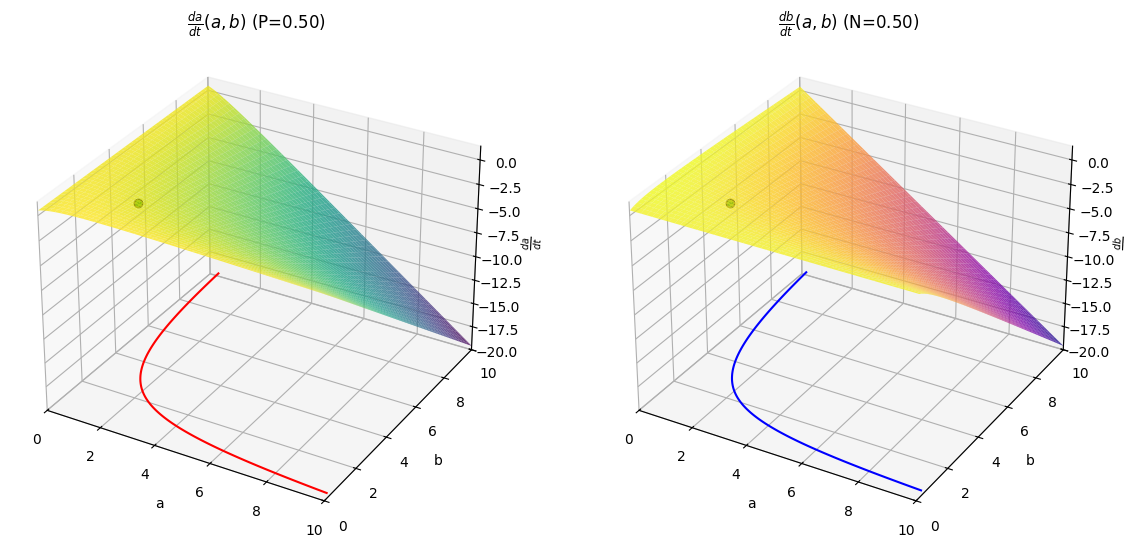

Output()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import root
from scipy.linalg import eigvals
from ipywidgets import widgets, interactive_output
from IPython.display import display, clear_output

# System equations
def da_dt(a, b, P):
    return P + a / (1 + a) - 0.1 * a - 0.2 * a * b

def db_dt(a, b, N):
    return N + b / (1 + b) - 0.1 * b - 0.2 * a * b

def system(y, P, N):
    a, b = y
    return [
        da_dt(a, b, P),
        db_dt(a, b, N)
    ]

# Jacobian matrix
def jacobian(a, b):
    dfda = 1 / (1 + a)**2 - 0.1 - 0.2 * b
    dfdb = -0.2 * a
    dgda = -0.2 * b
    dgdb = 1 / (1 + b)**2 - 0.1 - 0.2 * a
    return [[dfda, dfdb], [dgda, dgdb]]

# Create grid
a_vals = np.linspace(0.01, 10, 100)
b_vals = np.linspace(0.01, 10, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Set up 3D figure
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Sliders
P_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()

# Function to update plot
def update(P, N):
    ax1.clear()
    ax2.clear()

    # Compute derivatives over grid
    DA = da_dt(A, B, P)
    DB = db_dt(A, B, N)

    # Plot da/dt surface
    ax1.plot_surface(A, B, DA, cmap='viridis', alpha=0.8, edgecolor='none')
    ax1.contour(A, B, DA, levels=[0], colors='red', linestyles='solid', zdir='z', offset=np.min(DA))
    ax1.set_title(r'$\frac{da}{dt}(a, b)$' + f' (P={P:.2f})')
    ax1.set_xlabel('a')
    ax1.set_ylabel('b')
    ax1.set_zlabel(r'$\frac{da}{dt}$')

    # Plot db/dt surface
    ax2.plot_surface(A, B, DB, cmap='plasma', alpha=0.8, edgecolor='none')
    ax2.contour(A, B, DB, levels=[0], colors='blue', linestyles='solid', zdir='z', offset=np.min(DB))
    ax2.set_title(r'$\frac{db}{dt}(a, b)$' + f' (N={N:.2f})')
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel(r'$\frac{db}{dt}$')

    # Find fixed points
    initial_guesses = [[0.1, 0.1], [1.0, 1.0], [5.0, 0.1], [0.1, 5.0], [5.0, 5.0]]
    fixed_points = []

    for guess in initial_guesses:
        sol = root(lambda y: system(y, P, N), guess, method='hybr')
        if sol.success:
            a_sol, b_sol = sol.x
            if a_sol > 0 and b_sol > 0:
                is_new = True
                for a_prev, b_prev in fixed_points:
                    if abs(a_sol - a_prev) < 0.1 and abs(b_sol - b_prev) < 0.1:
                        is_new = False
                        break
                if is_new:
                    fixed_points.append((a_sol, b_sol))

    # Analyze stability and plot on both surfaces
    for a, b in fixed_points:
        J = jacobian(a, b)
        evals = eigvals(J)
        is_stable = all(np.real(evals) < 0)
        color = 'green' if is_stable else 'red'

        # Get da/dt and db/dt at fixed point to place dot correctly
        z1 = da_dt(a, b, P)
        z2 = db_dt(a, b, N)

        ax1.plot([a], [b], [z1], 'o', color=color, markersize=6, markeredgecolor='black')
        ax2.plot([a], [b], [z2], 'o', color=color, markersize=6, markeredgecolor='black')

    # Formatting
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)

    with output:
        clear_output(wait=True)
        display(fig)

# Initial call
update(P_slider.value, N_slider.value)

# Link widgets
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)

The a-nullcline and b-nullcline are drawn in red and blue and corresponds respectively to da/dt=0 and db/dt=0. Above the curve (da/dt>0), a is increasing, below, as is decreasing.

Calcul du nombre de points fixes (grille fine + clustering)…


100%|██████████| 2500/2500 [01:54<00:00, 21.86it/s]


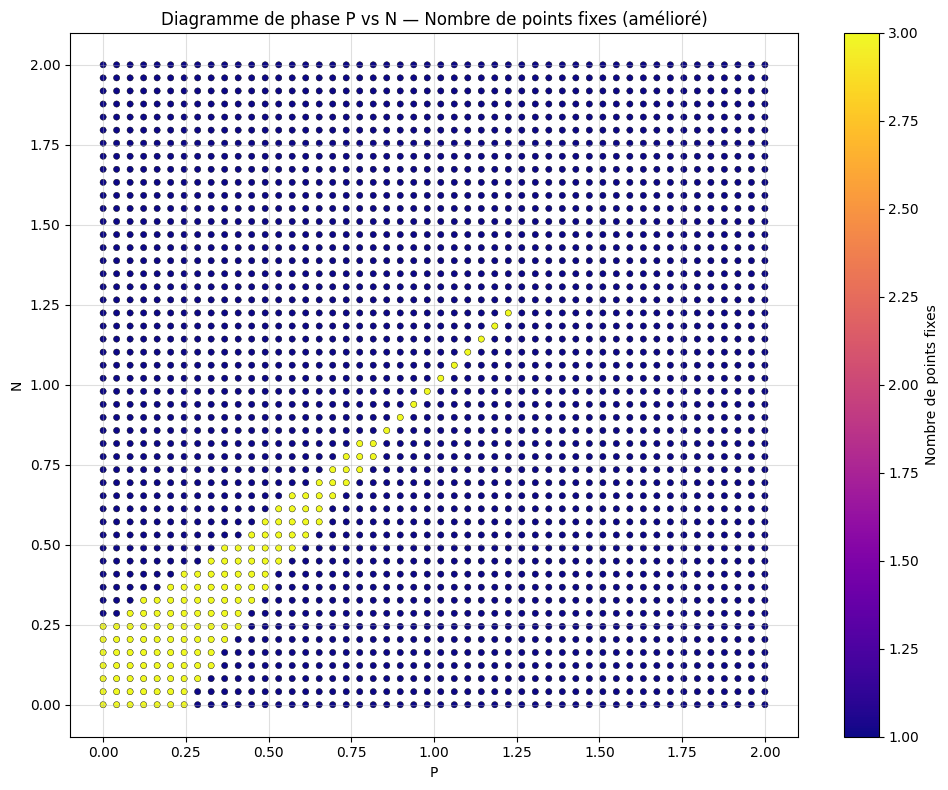

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from sklearn.cluster import DBSCAN
from itertools import product
from tqdm import tqdm

# === Paramètres ===
eta_a, eta_b = 0.1, 0.1
mu_a, mu_b = 0.2, 0.2
k_a, k_b = 0.7, 0.7
lambda_a, lambda_b = 1.0, 1.0

# === Équations du système ===
def da_dt(a, b, P):
    return P + (lambda_a*a)/(1 + k_a*a) - eta_a*a - mu_a*a*b

def db_dt(a, b, N):
    return N + (lambda_b*b)/(1 + k_b*b) - eta_b*b - mu_b*a*b

def system(y, P, N):
    a, b = y
    return [da_dt(a, b, P), db_dt(a, b, N)]

# === Recherche des points fixes pour un couple (P,N) ===
def find_fixed_points(P, N, a_guesses, b_guesses, eps_cluster=0.05):
    sols = []
    for a0, b0 in product(a_guesses, b_guesses):
        sol = root(lambda y: system(y, P, N), [a0, b0], method='hybr')
        if sol.success:
            a_sol, b_sol = sol.x
            if a_sol > 0 and b_sol > 0:
                sols.append([a_sol, b_sol])
    if not sols:
        return []
    sols = np.array(sols)
    # Clustering DBSCAN pour fusionner solutions trop proches
    clustering = DBSCAN(eps=eps_cluster, min_samples=1).fit(sols)
    labels = clustering.labels_
    # On prend un représentant par cluster (le centroïde)
    fixed_points = []
    for lab in np.unique(labels):
        pts = sols[labels == lab]
        centroid = pts.mean(axis=0)
        fixed_points.append(tuple(centroid))
    return fixed_points

# === Grille P vs N ===
P_vals = np.linspace(0, 2, 50)
N_vals = np.linspace(0, 2, 50)

# === Grille d'initialisations plus fine ===
a_guesses = np.linspace(0.01, 10, 20)
b_guesses = np.linspace(0.01, 10, 20)

# === Calcul du diagramme ===
data = []
print("Calcul du nombre de points fixes (grille fine + clustering)…")
for P, N in tqdm(list(product(P_vals, N_vals)), total=len(P_vals)*len(N_vals)):
    fps = find_fixed_points(P, N, a_guesses, b_guesses, eps_cluster=0.05)
    data.append((P, N, len(fps)))

data = np.array(data)
P_plot = data[:,0]
N_plot = data[:,1]
fp_count = data[:,2]

# === Affichage ===
plt.figure(figsize=(10,8))
sc = plt.scatter(P_plot, N_plot, c=fp_count, cmap='plasma', s=20, 
                 edgecolors='k', linewidth=0.3)
cb = plt.colorbar(sc, label="Nombre de points fixes")
plt.xlabel("P")
plt.ylabel("N")
plt.title("Diagramme de phase P vs N — Nombre de points fixes (amélioré)")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


Calcul du nombre de points fixes pour chaque (P, N)...


Grille P vs N: 100%|██████████| 40000/40000 [01:12<00:00, 550.07it/s]


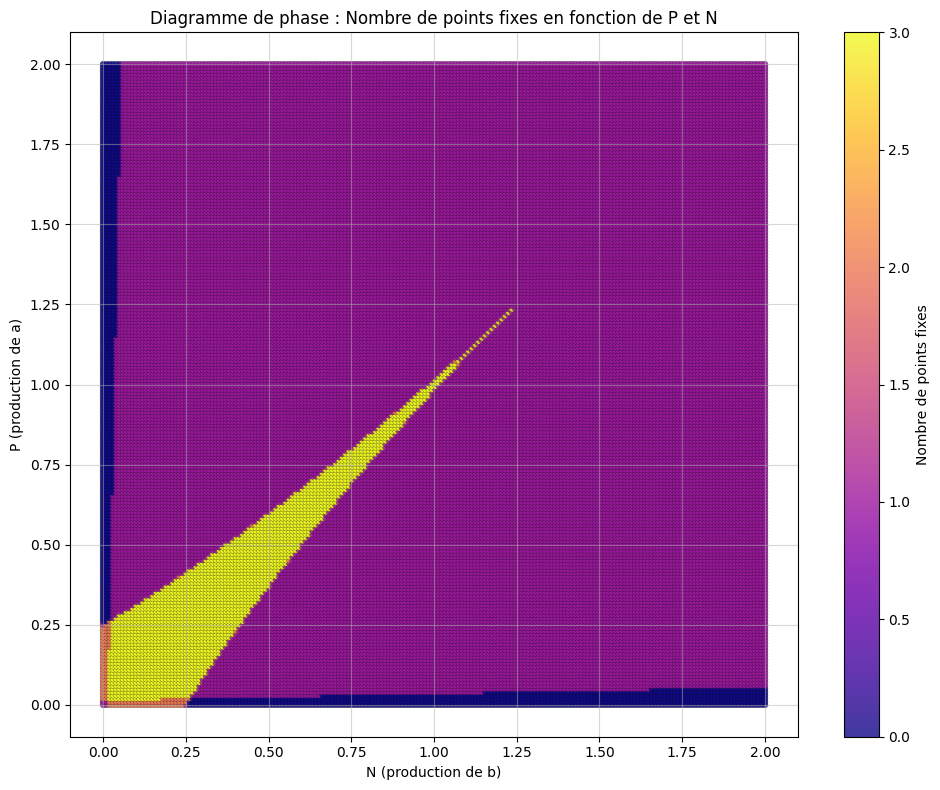

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from scipy.optimize import root

# === Paramètres ===
eta_a, eta_b = 0.1, 0.1
mu_a, mu_b = 0.2, 0.2
k_a, k_b = 0.7, 0.7
lambda_a, lambda_b = 1.0, 1.0

# === Système d'équations ===
def da_dt(a, b, P):
    return P + (lambda_a * a) / (1 + k_a * a) - eta_a * a - mu_a * a * b

def db_dt(a, b, N):
    return N + (lambda_b * b) / (1 + k_b * b) - eta_b * b - mu_b * a * b

def system(y, P, N):
    a, b = y
    return [da_dt(a, b, P), db_dt(a, b, N)]

# === Espace de paramètres P et N ===
P_vals = np.linspace(0, 2, 200)
N_vals = np.linspace(0, 2, 200)

# === Valeurs d'initialisation pour la recherche de points fixes ===
a_guesses = [0.1, 1, 5, 10]
b_guesses = [0.1, 1, 5, 10]

# === Stockage des résultats ===
bifurcation_data = []

# === Boucle principale avec barre de progression ===
print("Calcul du nombre de points fixes pour chaque (P, N)...")
for P, N in tqdm(product(P_vals, N_vals), total=len(P_vals)*len(N_vals), desc="Grille P vs N"):
    fixed_points = []
    seen = []

    for a0 in a_guesses:
        for b0 in b_guesses:
            try:
                sol = root(lambda y: system(y, P, N), [a0, b0], method='hybr')
                if sol.success:
                    a_sol, b_sol = sol.x
                    if a_sol > 0.01 and b_sol > 0.01:
                        if not any(np.hypot(a_sol - x, b_sol - y) < 0.3 for x, y in seen):
                            fixed_points.append((a_sol, b_sol))
                            seen.append((a_sol, b_sol))
            except:
                continue

    bifurcation_data.append((P, N, len(fixed_points)))

# === Conversion en tableau numpy ===
bifurcation_data = np.array(bifurcation_data)
P_plot = bifurcation_data[:, 0]
N_plot = bifurcation_data[:, 1]
fp_count = bifurcation_data[:, 2]

# === Affichage du diagramme de phase ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter( N_plot, P_plot, c=fp_count, cmap='plasma', s=20, alpha=0.8, edgecolors='k', linewidth=0.2)
cbar = plt.colorbar(scatter, label="Nombre de points fixes")
plt.xlabel("N (production de b)")
plt.ylabel("P (production de a)")
plt.title("Diagramme de phase : Nombre de points fixes en fonction de P et N")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Indeed, there exists for the system a bistable region 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import clear_output
import ipywidgets as widgets
from IPython.display import display

# === System Equations ===
def fa(a, b, P, params):
    eta, mu, ka, lambdaa = params
    return (P - eta * a - mu * a * b) * (1 + ka * a) + lambdaa * a

def fb(a, b, N, params):
    eta, mu, kb, lambdab = params
    return (N - eta * b - mu * a * b) * (1 + kb * b) + lambdab * b

def system(x, P, N, params):
    a, b = x
    return [fa(a, b, P, params), fb(a, b, N, params)]

# === Jacobian Computation ===
def jacobian(a, b, P, N, params):
    eta, mu, ka, lambdaa = params
    kb = params[2]
    lambdab = params[3]

    dfda = (-eta - mu*b) * (1 + ka*a) + (P - eta*a - mu*a*b)*ka + lambdaa
    dfdb = (-mu*a) * (1 + ka*a)
    dgda = (-mu*b) * (1 + kb*b)
    dgdb = (-eta - mu*a) * (1 + kb*b) + (N - eta*b - mu*a*b)*kb + lambdab

    return np.array([[dfda, dfdb], [dgda, dgdb]])

# === Stability and Bifurcation Detection ===
def get_bifurcation_info(J):
    eigvals = np.linalg.eigvals(J)
    real_parts = np.real(eigvals)
    if np.all(real_parts < 0): stability = "stable"
    elif np.any(real_parts > 0): stability = "unstable"
    else: stability = "neutral"

    bif_type = None
    if any(np.isclose(np.real(ev), 0, atol=1e-4) for ev in eigvals):
        if any(np.imag(ev) != 0 for ev in eigvals):
            bif_type = "hopf"
        else:
            num_zero_real = sum(1 for ev in eigvals if np.isclose(np.real(ev), 0, atol=1e-4))
            if num_zero_real == 1:
                bif_type = "saddle-node"
            elif num_zero_real == 2:
                bif_type = "transcritical"
    return stability, bif_type

# === Main Function to Compute Bifurcation Diagram ===
def plot_bifurcation_diagram(**kwargs):
    clear_output(wait=True)

    # Unpack parameters from sliders
    N_fixed = kwargs['N']
    eta_val = kwargs['eta']
    mu_val = kwargs['mu']
    ka_val = kwargs['ka']
    lambdaa_val = kwargs['lambdaa']
    kb_val = kwargs['kb'] or ka_val  # Default kb = ka
    lambdab_val = kwargs['lambdab'] or lambdaa_val  # Default lambdab = lambdaa

    params = [eta_val, mu_val, ka_val, lambdaa_val]
    full_params = [eta_val, mu_val, kb_val, lambdab_val]  # For fb

    P_range = np.linspace(0.01, 2.0, 80)
    results = []

    for P in P_range:
        fps = []
        a_guesses = np.linspace(0.01, 5, 10)
        b_guesses = np.linspace(0.01, 5, 10)

        # Find fixed points
        for a0 in a_guesses:
            for b0 in b_guesses:
                try:
                    sol = fsolve(lambda x: system(x, P, N_fixed, params), (a0, b0), xtol=1e-8)
                    a_sol, b_sol = np.round(sol, 5)
                    if a_sol >= 0 and b_sol >= 0:
                        fps.append((a_sol, b_sol))
                except:
                    continue

        unique_fps = list(set(fps))

        # Analyze stability at each fixed point
        for a_sol, b_sol in unique_fps:
            J = jacobian(a_sol, b_sol, P, N_fixed, full_params)
            stability, bif_type = get_bifurcation_info(J)
            results.append({
                'P': P,
                'a': a_sol,
                'b': b_sol,
                'stability': stability,
                'bif_type': bif_type
            })

    # Sort results by P
    stable_points = []
    unstable_points = []
    hopf_points = []
    sn_points = []
    tc_points = []

    for r in results:
        p = r['P']
        a = r['a']
        if r['stability'] == 'stable':
            stable_points.append((p, a))
        elif r['stability'] == 'unstable':
            unstable_points.append((p, a))
        if r['bif_type'] == 'hopf':
            hopf_points.append((p, a))
        elif r['bif_type'] == 'saddle-node':
            sn_points.append((p, a))
        elif r['bif_type'] == 'transcritical':
            tc_points.append((p, a))

    # Convert to NumPy arrays
    stable = np.array(stable_points)
    unstable = np.array(unstable_points)
    hopf = np.array(hopf_points)
    sn = np.array(sn_points)
    tc = np.array(tc_points)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 5))
    if len(stable) > 0:
        ax.plot(stable[:, 0], stable[:, 1], 'b-', label='Stable', linewidth=2)
    if len(unstable) > 0:
        ax.plot(unstable[:, 0], unstable[:, 1], 'r--', label='Unstable', linewidth=2)
    if len(hopf) > 0:
        ax.scatter(hopf[:, 0], hopf[:, 1], c='green', s=60, label='Hopf')
    if len(sn) > 0:
        ax.scatter(sn[:, 0], sn[:, 1], c='orange', s=60, label='Saddle-node')
    if len(tc) > 0:
        ax.scatter(tc[:, 0], tc[:, 1], c='purple', s=60, label='Transcritical')

    ax.set_xlabel("P")
    ax.set_ylabel("a at Fixed Point")
    ax.set_title(f"Bifurcation Diagram (N={N_fixed}, μ={mu_val}, η={eta_val}, λa={lambdaa_val}, λb={lambdab_val})")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

# === Interactive Widgets ===
style = {'description_width': 'initial'}

ui_elements = {
    'N': widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N'),
    'eta': widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='η'),
    'mu': widgets.FloatSlider(value=0.2, min=0.0, max=1.0, step=0.01, description='μ'),
    'ka': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='kα'),
    'kb': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='kβ'),
    'lambdaa': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='λa'),
    'lambdab': widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='λb'),
}

output = widgets.interactive_output(plot_bifurcation_diagram, ui_elements)
ui = widgets.VBox([widgets.HBox([v for v in ui_elements.values()][:4]), widgets.HBox([v for v in ui_elements.values()][4:])])

display(ui, output)

Output()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

P_range = np.linspace(0.01, 2.0, 100)
N_fixed = 0.5

results = []

for P in tqdm(P_range, desc="Scanning P"):

    a_guesses = np.linspace(0.01, 5, 10)
    b_guesses = np.linspace(0.01, 5, 10)
    fps = []

    # Find fixed points
    for a0 in a_guesses:
        for b0 in b_guesses:
            try:
                sol = fsolve(lambda x: system(x, P, N_fixed), (a0, b0), xtol=1e-8)
                a_sol, b_sol = np.round(sol, 5)
                if a_sol >= 0 and b_sol >= 0:
                    fps.append((a_sol, b_sol))
            except:
                continue

    unique_fps = list(set(fps))

    # Analyze stability for each fixed point
    for idx, (a_sol, b_sol) in enumerate(unique_fps):
        J = jacobian(a_sol, b_sol, P, N_fixed)
        stability, bif_type, eigvals = get_stability_info(J)
        results.append({
            'P': P,
            'a': a_sol,
            'b': b_sol,
            'stability': stability,
            'bif_type': bif_type,
            'eigenvalues': eigvals
        })

        if bif_type:
            print(f"Bifurcation detected at P = {P:.4f}, a = {a_sol:.4f}, b = {b_sol:.4f}: {bif_type}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.display import clear_output
# Constants
eta = 0.1
mu = 0.2
ka = 1.0
kb = 1.0
lambdaa = 1.0
lambdab = 1.0

# Functions
def fa(a, b, P):
    return (P - eta * a - mu * a * b) * (1 + ka * a) + lambdaa * a

def fb(a, b, N):
    return (N - eta * b - mu * a * b) * (1 + kb * b) + lambdab * b

# Function to compute and plot fixed points
from IPython.display import clear_output

# Function to compute and plot fixed points
def compute_and_plot(P, N):
    clear_output(wait=True)
    a_vals = np.linspace(0, 5, 400)
    b_vals = np.linspace(0, 5, 400)
    A, B = np.meshgrid(a_vals, b_vals)
    
    Z1 = fa(A, B, P)
    Z2 = fb(A, B, N)

    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot contours
    cs1 = ax.contour(A, B, Z1, levels=[0], colors='blue', linewidths=2)
    cs2 = ax.contour(A, B, Z2, levels=[0], colors='red', linewidths=2)
    
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    ax.set_title(f"Fixed points for P={P}, N={N}")
    ax.grid(True)
    
    # LEGEND FIX using legend_elements():
    h1, _ = cs1.legend_elements()
    h2, _ = cs2.legend_elements()
    ax.legend(h1 + h2, ["fa=0", "fb=0"])

    # Find numerical intersection points
    fixed_points = []
    for a0 in np.linspace(0.1, 5, 10):
        for b0 in np.linspace(0.1, 5, 10):
            try:
                sol = fsolve(lambda x: [fa(x[0], x[1], P), fb(x[0], x[1], N)], [a0, b0])
                if (0 <= sol[0] <= 5) and (0 <= sol[1] <= 5):
                    fixed_points.append(tuple(np.round(sol, 4)))
            except:
                continue

    fixed_points = list(set(fixed_points))
    
    # Plot fixed points
    for pt in fixed_points:
        ax.plot(pt[0], pt[1], 'ko')
        ax.annotate(f"({pt[0]:.2f},{pt[1]:.2f})", (pt[0], pt[1]), textcoords="offset points", xytext=(5,5))

    plt.show()

# Interactive widgets
P_slider = widgets.FloatSlider(value=0.2, min=0.0, max=1.0, step=0.01, description='P:')
N_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='N:')

ui = widgets.HBox([P_slider, N_slider])
out = widgets.interactive_output(compute_and_plot, {'P': P_slider, 'N': N_slider})

display(ui, out)


Output()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Paramètres fixes
w1p, w1n = 0.017, 0.017
w2p, w2n = 0.025, 0.025
mu = 0.2
ka, kb = 0.1, 0.1
eta = 0.1
lambd_a, lambd_b = 0.01, 0.01

# Fonctions fa et fb
def fa(a, b, x1p, x2p):
    return (w1p*x1p + w2p*x2p - eta*a - mu*a*b)*(1 + ka*a) + lambd_a*a

def fb(a, b, x1n, x2n):
    return (w1n*x1n + w2n*x2n - eta*b - mu*a*b)*(1 + kb*b) + lambd_b*b

# Fonction de tracé
@interact(
    x1p=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x1p'),
    x2p=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x2p'),
    x1n=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x1n'),
    x2n=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x2n')
)
def plot_fa_fb(x1p, x2p, x1n, x2n):
    a_vals = np.linspace(0, 5, 300)
    b_vals = np.linspace(0, 5, 300)

    # On choisit b=1 dans fa(a,b), a=1 dans fb(a,b) pour tracer les courbes (valeurs fixées arbitrairement)
    b_fixed = 0
    a_fixed = 0

    fa_vals = [fa(a, b_fixed, x1p, x2p) for a in a_vals]
    fb_vals = [fb(a_fixed, b, x1n, x2n) for b in b_vals]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(a_vals, fa_vals, label='fa(a)', color='blue')
    ax1.axhline(0, color='black', linestyle='--')
    ax1.set_title('fa vs a (b = 1)')
    ax1.set_xlabel('a')
    ax1.set_ylabel('fa(a)')
    ax1.grid(True)

    ax2.plot(b_vals, fb_vals, label='fb(b)', color='green')
    ax2.axhline(0, color='black', linestyle='--')
    ax2.set_title('fb vs b (a = 1)')
    ax2.set_xlabel('b')
    ax2.set_ylabel('fb(b)')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()



interactive(children=(FloatSlider(value=1.0, description='x1p', max=5.0), FloatSlider(value=1.0, description='…

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D

# Paramètres constants
w1p, w1n = 0.017, 0.017
w2p, w2n = 0.025, 0.025
mu = 0.2
ka, kb = 0.1, 0.1
eta = 0.1
lambd_a, lambd_b = 0.01, 0.01

# Fonctions
def fa(a, b, x1p, x2p):
    return (w1p*x1p + w2p*x2p - eta*a - mu*a*b)*(1 + ka*a) + lambd_a*a

def fb(a, b, x1n, x2n):
    return (w1n*x1n + w2n*x2n - eta*b - mu*a*b)*(1 + kb*b) + lambd_b*b

# Grille 2D pour a et b
a_vals = np.linspace(0, 5, 100)
b_vals = np.linspace(0, 5, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Fonction d'affichage
@interact(
    x1p=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x1p'),
    x2p=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x2p'),
    x1n=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x1n'),
    x2n=FloatSlider(min=0, max=5, step=0.1, value=1.0, description='x2n')
)
def plot_surfaces(x1p, x2p, x1n, x2n):
    FA = fa(A, B, x1p, x2p)
    FB = fb(A, B, x1n, x2n)

    fig = plt.figure(figsize=(14, 6))

    # Graphe de fa
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(A, B, FA, cmap='viridis')
    ax1.set_title('fa(a, b)')
    ax1.set_xlabel('a')
    ax1.set_ylabel('b')
    ax1.set_zlabel('fa')

    # Graphe de fb
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(A, B, FB, cmap='plasma')
    ax2.set_title('fb(a, b)')
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('fb')

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='x1p', max=5.0), FloatSlider(value=1.0, description='…

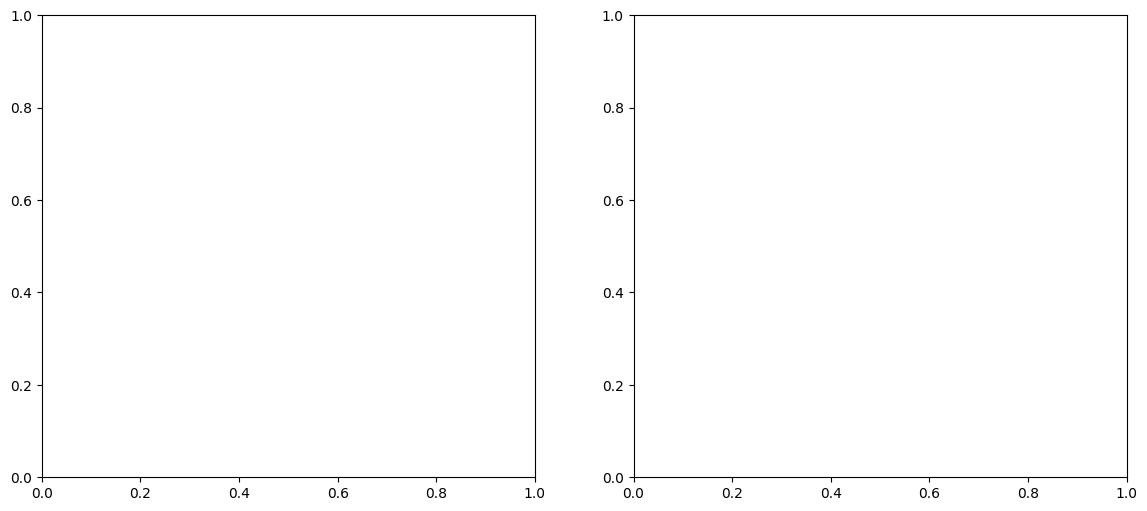

Output()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import ipywidgets as widgets
from IPython.display import display, clear_output

# Constants
w1p, w1n = 0.017, 0.017
w2p, w2n = 0.025, 0.025
mu = 0.2
ka, kb = 0.1, 0.1
eta = 0.1
lambda_a, lambda_b = 0.01, 0.01

# Time derivative functions
def fa(a, b, x1p, x2p):
    return (w1p * x1p + w2p * x2p - eta * a - mu * a * b) * (1 + ka * a) + lambda_a * a

def fb(a, b, x1n, x2n):
    return (w1n * x1n + w2n * x2n - eta * b - mu * a * b) * (1 + kb * b) + lambda_b * b

# Derivatives for stability analysis
def dfa_da(a, b):
    return (-eta - mu * b) * (1 + ka * a) + (w1p * x1p_slider.value + w2p * x2p_slider.value - eta * a - mu * a * b) * ka + lambda_a

def dfb_db(a, b):
    return (-eta - mu * a) * (1 + kb * b) + (w1n * x1n_slider.value + w2n * x2n_slider.value - eta * b - mu * a * b) * kb + lambda_b

# Analyze fixed points
def analyze_fixed_points(ax1, ax2, x1p, x2p, x1n, x2n):
    a_vals = np.linspace(0.01, 10, 1000)
    b_vals = np.linspace(0.01, 10, 1000)
    fa_vals = fa(a_vals, 1.0, x1p, x2p)
    fb_vals = fb(1.0, b_vals, x1n, x2n)
    
    ax1.clear()
    ax2.clear()
    
    ax1.plot(a_vals, fa_vals, label='fa(a, b=1)')
    ax1.axhline(0, color='k', linestyle='--')
    ax1.set_xlabel('a')
    ax1.set_ylabel('fa')
    ax1.set_title('fa vs a')
    ax1.legend()
    
    ax2.plot(b_vals, fb_vals, label='fb(a=1, b)', color='orange')
    ax2.axhline(0, color='k', linestyle='--')
    ax2.set_xlabel('b')
    ax2.set_ylabel('fb')
    ax2.set_title('fb vs b')
    ax2.legend()
    
    ax1.set_ylim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax1.set_xlim(0, 10)
    ax2.set_xlim(0, 10)

# Sliders
x1p_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='x1p')
x2p_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='x2p')
x1n_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='x1n')
x2n_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='x2n')

# Output and update logic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
output_widget = widgets.Output()

def update(x1p, x2p, x1n, x2n):
    analyze_fixed_points(ax1, ax2, x1p, x2p, x1n, x2n)
    with output_widget:
        clear_output(wait=True)
        display(fig)

interactive_plot = widgets.interactive_output(update, {
    'x1p': x1p_slider,
    'x2p': x2p_slider,
    'x1n': x1n_slider,
    'x2n': x2n_slider
})

display(widgets.VBox([x1p_slider, x2p_slider, x1n_slider, x2n_slider, output_widget]))
display(interactive_plot)


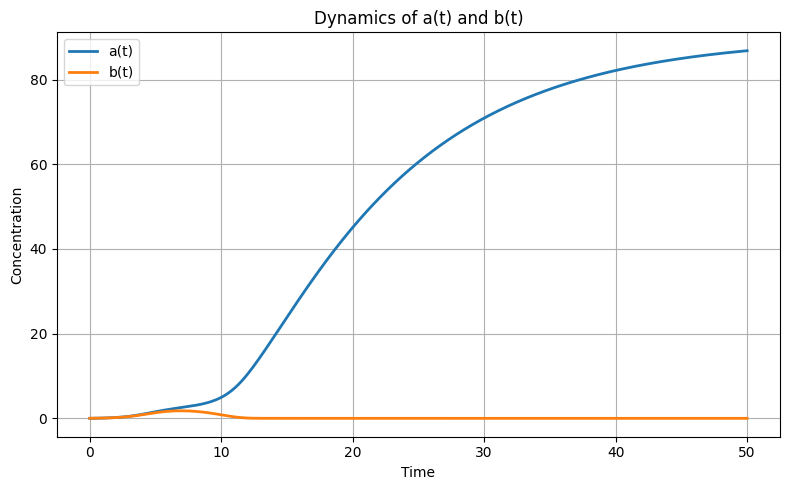

In [ ]:
#!/usr/bin/env python3
"""
simulate_ab_constants.py

Integrates:
    da/dt = P + λ a/(1 + kα a) − η a − μ a b
    db/dt = N + λ̃ b/(1 + kβ b) − η b − μ a b

where P = ∑ w_{p,i} x_{p,i} and N = ∑ w_{n,j} x_{n,j} are fixed constants.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# === FIXED INPUTS AND WEIGHTS ===
# (edit these four constants as needed)
x_p = [1.0, 0.3]      # x_{p,1}, x_{p,2}
w_p = [0.017,0.025]      # w_{p,1}, w_{p,2}

x_n = [0.8, 0.5]      # x_{n,1}, x_{n,2}
w_n = [0.017, 0.0258]      # w_{n,1}, w_{n,2}

# Precompute the constant source terms P and N:
P = w_p[0]*x_p[0] + w_p[1]*x_p[1]
N = w_n[0]*x_n[0] + w_n[1]*x_n[1]

# === KINETIC PARAMETERS ===
lambda_a = 1.0    # λ
k_alpha  = 0.1    # k_α
lambda_b = 1.0    # λ̃
k_beta   = 0.1    # k_β
eta      = 0.1    # η
mu       = 0.3   # μ

# === ODE SYSTEM ===
def odes(t, y):
    a, b = y
    da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
    db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
    return [da, db]

# === INITIAL CONDITIONS & TIME GRID ===
y0     = [0.01, 0.01]               # [a(0), b(0)]
t_span = (0.0, 50.0)              # time interval
t_eval = np.linspace(*t_span, 1000)

# === INTEGRATION ===
sol = solve_ivp(
    odes,
    t_span,
    y0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-6,
    atol=1e-9
)

# === PLOTTING ===
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label='a(t)', linewidth=2)
plt.plot(sol.t, sol.y[1], label='b(t)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of a(t) and b(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



For now, it seems we indeed have a bistable system, where, only one species remains

In [ ]:
"""
simulate_fraction_map_with_progress.py

Sweep P and N over a 2D grid, simulate
    da/dt = P    + λ·a/(1 + kα·a) − η·a − μ·a·b
    db/dt = N    + λ̃·b/(1 + kβ·b) − η·b − μ·a·b

for each (P,N) up to time T_final, then compute the fraction
    f = a(T_final) / [a(T_final) + b(T_final)]
and plot f as a continuous heatmap.  
A tqdm progress bar shows simulation progress.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

# === KINETIC PARAMETERS ===
lambda_a = 1.0   # λ
k_alpha  = 0.1   # k_α
lambda_b = 1.0   # λ̃
k_beta   = 0.1   # k_β
eta      = 0.1   # η
mu       = 0.2  # μ

# === GRID SETTINGS ===
P_min, P_max, nP = 0.0, 5.0, 50   # P axis: 0→5 in 100 steps
N_min, N_max, nN = 0.0, 5.0, 50   # N axis: 0→5 in 100 steps
P_vals = np.linspace(P_min, P_max, nP)
N_vals = np.linspace(N_min, N_max, nN)

# === SIMULATION SETTINGS ===
T_final = 30        # simulate until t = 50
y0 = [0.1, 0.1]       # [a(0), b(0)]
rtol, atol = 1e-6, 1e-9

# === Prepare fraction array ===
# frac[j,i] = a_final / (a_final + b_final)
frac = np.zeros((nN, nP))

def make_odes(P, N):
    """Return the ODE right-hand side for given P and N."""
    def odes(t, y):
        a, b = y
        da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
        db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
        return [da, db]
    return odes

# === Sweep over grid with progress bar ===
total_pts = nP * nN
pbar = tqdm(total=total_pts, desc="Simulating grid")

for i, P in enumerate(P_vals):
    for j, N in enumerate(N_vals):
        sol = solve_ivp(
            make_odes(P, N),
            [0, T_final],
            y0,
            t_eval=[T_final],
            rtol=rtol,
            atol=atol
        )
        aT, bT = sol.y[:, -1]
        frac[j, i] = aT / (aT + bT) if (aT + bT) > 0 else 0.0
        pbar.update()

pbar.close()






Simulating grid: 100%|██████████| 2500/2500 [00:26<00:00, 95.39it/s] 


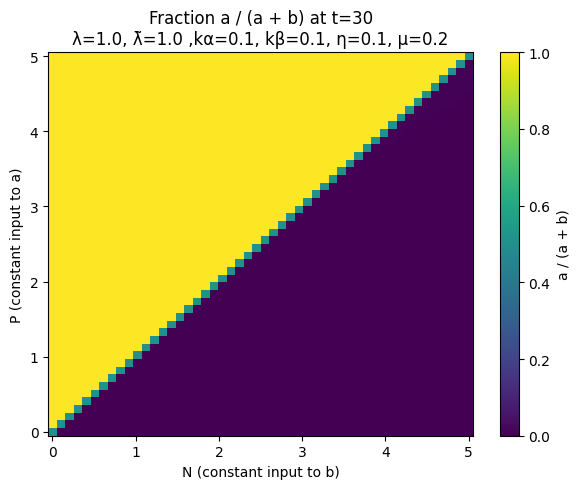

In [39]:
# === Plot the fraction heatmap with N on X-axis and P on Y-axis ===
plt.figure(figsize=(6, 5))

# Transpose frac to match axes (P on Y, N on X)
pcm = plt.pcolormesh(N_vals, P_vals, frac.T, cmap='viridis', shading='auto')

plt.xlabel('N (constant input to b)')     # X-axis
plt.ylabel('P (constant input to a)')     # Y-axis
plt.title(
    f'Fraction a / (a + b) at t={T_final}\n'
    f'λ={lambda_a}, λ̃={lambda_b} ,kα={k_alpha}, kβ={k_beta}, η={eta}, μ={mu}'
)

cbar = plt.colorbar(pcm)
cbar.set_label('a / (a + b)')

plt.tight_layout()
plt.show()



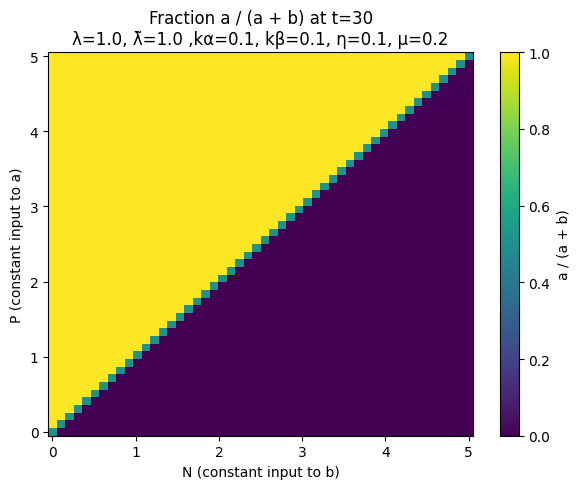

Simulating x_p2 vs x_n2: 100%|██████████| 2500/2500 [00:40<00:00, 61.31it/s]


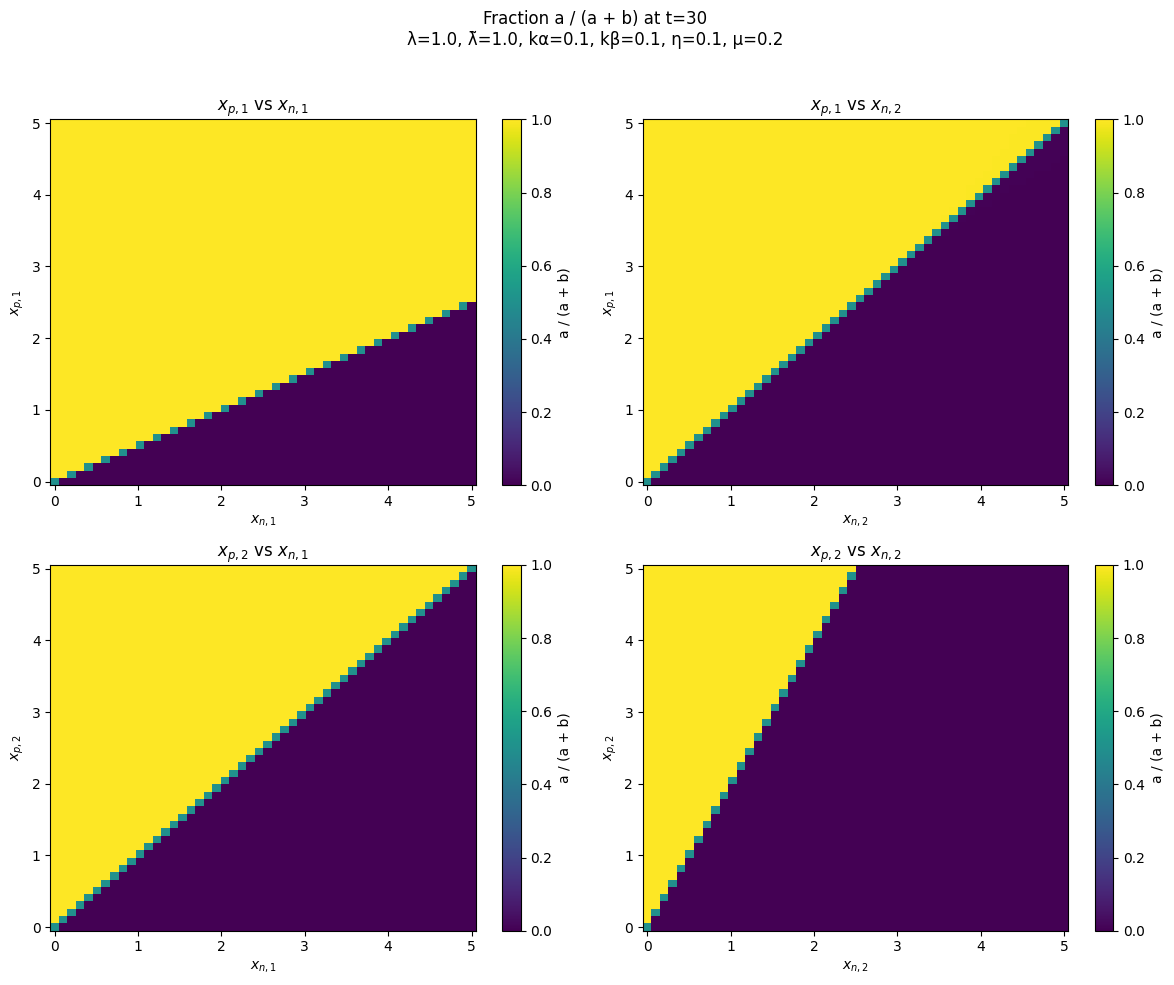

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

# === PARAMETERS ===
lambda_a = 1.0
k_alpha  = 0.1
lambda_b = 1.0
k_beta   = 0.1
eta      = 0.1
mu       = 0.2

# === WEIGHTS ===
w_p = np.array([1.0, 0.5])  # weights for x_p1, x_p2
w_n = np.array([0.5, 1.0])  # weights for x_n1, x_n2

# === GRID SETTINGS ===
x_min, x_max, nx = 0.0, 5.0, 50
x_vals = np.linspace(x_min, x_max, nx)

# === SIMULATION SETTINGS ===
T_final = 30
y0 = [0.1, 0.1]
rtol, atol = 1e-6, 1e-9

# === ODE function ===
def make_odes(P, N):
    def odes(t, y):
        a, b = y
        da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
        db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
        return [da, db]
    return odes

# === Create figure for 4 subplots ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# === Loop over i, j = 1,2 ===
for idx, (i, j) in enumerate([(0,0), (0,1), (1,0), (1,1)]):  # python indices: 0 or 1
    frac = np.zeros((nx, nx))  # reset for each (i,j)
    
    pbar = tqdm(total=nx*nx, desc=f"Simulating x_p{i+1} vs x_n{j+1}")
    
    for xi, x_pi in enumerate(x_vals):
        for xj, x_nj in enumerate(x_vals):
            # Build x_p and x_n vectors
            x_p = np.zeros(2)
            x_n = np.zeros(2)
            x_p[i] = x_pi   # only x_p,i varies
            x_n[j] = x_nj   # only x_n,j varies

            # Compute P and N
            P = np.dot(w_p, x_p)
            N = np.dot(w_n, x_n)

            # Solve ODE
            sol = solve_ivp(
                make_odes(P, N),
                [0, T_final],
                y0,
                t_eval=[T_final],
                rtol=rtol,
                atol=atol
            )
            aT, bT = sol.y[:, -1]
            frac[xj, xi] = aT / (aT + bT) if (aT + bT) > 0 else 0.0
            pbar.update()
    
    pbar.close()

    # === Plot heatmap ===
    pcm = axes[idx].pcolormesh(x_vals, x_vals, frac.T, cmap='viridis', shading='auto')
    axes[idx].set_xlabel(rf'$x_{{n,{j+1}}}$')
    axes[idx].set_ylabel(rf'$x_{{p,{i+1}}}$')
    axes[idx].set_title(rf'$x_{{p,{i+1}}}$ vs $x_{{n,{j+1}}}$')

    fig.colorbar(pcm, ax=axes[idx], label='a / (a + b)')

plt.suptitle(
    f'Fraction a / (a + b) at t={T_final}\n'
    f'λ={lambda_a}, λ̃={lambda_b}, kα={k_alpha}, kβ={k_beta}, η={eta}, μ={mu}'
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
